### Import libraries and datasets:

In [117]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [118]:
csv_fts = "datasets/FTS Historical Data.csv"
csv_mwg = "datasets/MWG Historical Data.csv"
csv_vic = "datasets/VIC Historical Data.csv"

df_fts = pd.read_csv(csv_fts, thousands=',')
df_mwg = pd.read_csv(csv_mwg, thousands=',')
df_vic = pd.read_csv(csv_vic, thousands=',')

### Dataset 1: FTS

In [119]:
np.round(df_fts.describe(), 2)

,Price,Open,High,Low
count,1360.00,1360.00,1360.00,1360.00
mean,16513.87,16504.51,16868.40,16146.61
std,11831.89,11836.49,12138.66,11532.13
min,5788.40,5701.80,5859.20,5701.80
25%,7726.32,7733.80,7855.10,7607.60
50%,9413.30,9412.00,9536.30,9254.10
75%,24685.30,24763.50,25658.80,24033.02
max,51873.90,52708.30,53473.20,51109.00


- Cast Date column to datetime type
- Sort data ascending by Date

In [120]:
df_fts['Date'] = pd.to_datetime(df_fts['Date'])
df_fts = df_fts.sort_values(by='Date', ascending=True)
df_fts.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
1359,2018-01-02,5788.4,5859.2,5859.2,5788.4,103.55K,-1.21%
1358,2018-01-03,5953.7,5764.7,5977.4,5741.1,245.02K,2.86%
1357,2018-01-04,6024.6,5953.7,6142.8,5906.5,167.80K,1.19%
1356,2018-01-05,5882.9,5977.4,6048.2,5882.9,113.88K,-2.35%
1355,2018-01-08,6001.0,5859.2,6001.0,5764.7,63.36K,2.01%


- Split Price data
- Reset index

In [121]:
df_price = df_fts[['Price']]
df_price = df_price.reset_index(drop=True)
df_price.head(5)

,Price
0,5788.4
1,5953.7
2,6024.6
3,5882.9
4,6001.0


- Drop null values:

In [122]:
print('Before shape:', df_price.shape)

df_price.dropna()
print('After shape:', df_price.shape)

Before shape: (1360, 1)
After shape: (1360, 1)


- Split data into train, test, val (7.5-2.5):

In [123]:
train_size = int(0.75 * len(df_price))
val_size = 30 # 30 days
test_size = len(df_price) - train_size - val_size

train_data = df_price[:train_size]
test_data = df_price[train_size:train_size+test_size]
val_data = df_price[train_size+test_size:]

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(1020, 1)
(310, 1)
(30, 1)


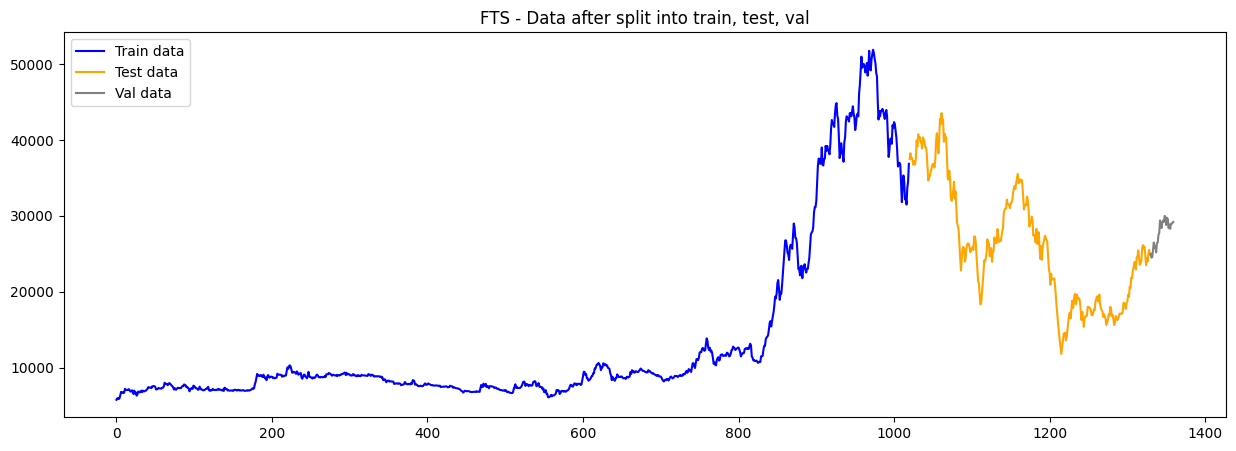

In [124]:
plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Price'], 'b')
plt.plot(test_data.index, test_data['Price'], 'orange')
plt.plot(val_data.index, val_data['Price'], 'gray')
plt.legend(['Train data', 'Test data', 'Val data'], loc='upper left')
plt.title('FTS - Data after split into train, test, val')
plt.show()

- Prepare x, y data:

In [125]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])

x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])

- Model training:

In [126]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

- Model Testing (one-step prediction):

In [127]:
y_pred_test = model_lr.predict(x_test)

- Model Validation (multi-step prediction) - 30 days prediction:

In [128]:
number_of_days_to_predict = 30

x_next_N_days = np.array(val_data.index).reshape(-1, 1)
y_next_N_days = model_lr.predict(x_next_N_days)

print('Predicted prices for the next {0} days:'.format(number_of_days_to_predict))
print(y_next_N_days)

Predicted prices for the next 60 days:
[34914.55423847 34940.87112646 34967.18801444 34993.50490243
 35019.82179041 35046.1386784  35072.45556638 35098.77245437
 35125.08934235 35151.40623033 35177.72311832 35204.0400063
 35230.35689429 35256.67378227 35282.99067026 35309.30755824
 35335.62444623 35361.94133421 35388.2582222  35414.57511018
 35440.89199817 35467.20888615 35493.52577414 35519.84266212
 35546.1595501  35572.47643809 35598.79332607 35625.11021406
 35651.42710204 35677.74399003]


- Model evaluating (RMSE - MAPE - MSLE):

In [129]:
# RMSE
test_rmse = mean_squared_error(y_pred_test, y_test, squared=False)
ndays_rmse = mean_squared_error(y_next_N_days, y_val, squared=False)
print('Testing RMSE:', np.round(test_rmse, 4))
print('Predicting {0} days RMSE:'.format(number_of_days_to_predict), np.round(ndays_rmse, 4))

# MAPE
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
ndays_mape = mean_absolute_percentage_error(y_next_N_days, y_val)
print('\nTesting MAPE:', np.round(test_mape, 4))
print('Predicting {0} days MAPE:'.format(number_of_days_to_predict), np.round(ndays_mape, 4))

# MSLE
test_msle = mean_squared_log_error(y_pred_test, y_test)
ndays_msle = mean_squared_log_error(y_next_N_days, y_val)
print('\nTesting MSLE:', np.round(test_msle, 4))
print('Predicting {0} days MSLE:'.format(number_of_days_to_predict), np.round(ndays_msle, 4))


Testing RMSE: 10906.6064
Predicting 60 days RMSE: 7607.5688

Testing MAPE: 0.3005
Predicting 60 days MAPE: 0.2113

Testing MSLE: 0.1821
Predicting 60 days MSLE: 0.0605


- Prediction plotting:

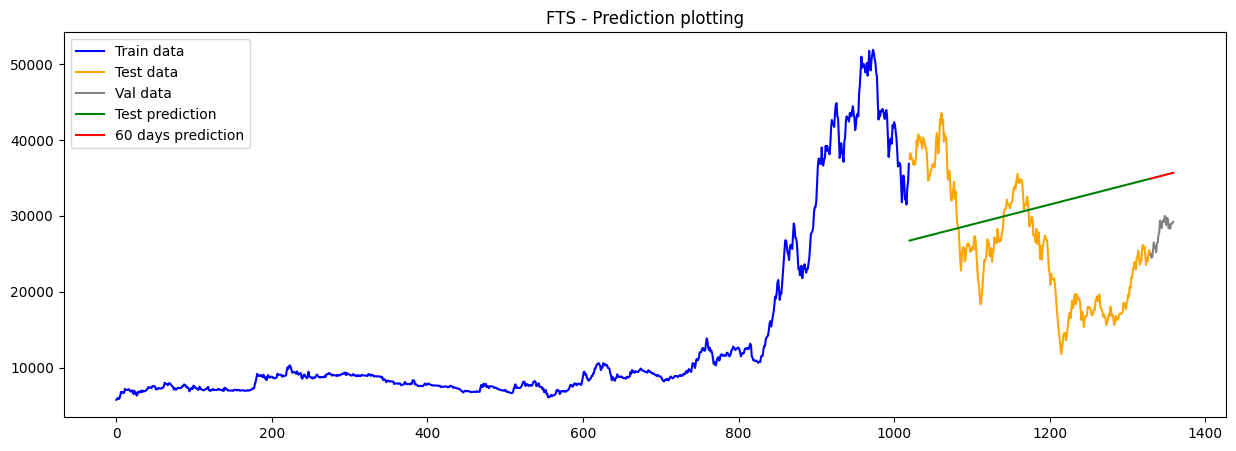

In [130]:
plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Price'], 'b')
plt.plot(test_data.index, test_data['Price'], 'orange')
plt.plot(val_data.index, val_data['Price'], 'gray')

plt.plot(test_data.index, y_pred_test, 'green')
plt.plot(val_data.index, y_next_N_days, 'red')

plt.legend(['Train data', 'Test data', 'Val data', 'Test prediction', '{0} days prediction'.format(number_of_days_to_predict)], loc='upper left')
plt.title('FTS - Prediction plotting')
plt.show()

### Dataset 2: MWG

In [131]:
np.round(df_mwg.describe(), 2)

,Price,Open,High,Low
count,1360.00,1360.00,1360.00,1360.00
mean,41652.08,41627.26,42181.22,41070.77
std,15199.76,15193.25,15423.30,14920.02
min,19198.00,19132.00,20273.00,18350.00
25%,28196.00,28300.50,28549.00,27968.75
50%,38008.00,38025.00,38381.00,37612.50
75%,48937.50,48560.25,49657.00,47924.00
max,79582.00,79980.00,80874.00,79036.00


- Cast Date column to datetime type
- Sort data ascending by Date

In [132]:
df_mwg['Date'] = pd.to_datetime(df_mwg['Date'])
df_mwg = df_mwg.sort_values(by='Date', ascending=True)
df_mwg.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
1359,2018-01-02,31276,31039,31394,31039,2.27M,0.76%
1358,2018-01-03,31892,31323,32034,31276,4.53M,1.97%
1357,2018-01-04,31963,31773,32081,31750,2.71M,0.22%
1356,2018-01-05,31608,31987,31987,31465,2.93M,-1.11%
1355,2018-01-08,31110,31394,31513,31039,3.01M,-1.58%


- Split Price data
- Reset index

In [133]:
df_price = df_mwg[['Price']]
df_price = df_price.reset_index(drop=True)
df_price.head(5)

,Price
0,31276
1,31892
2,31963
3,31608
4,31110


- Drop null values:

In [134]:
print('Before shape:', df_price.shape)

df_price.dropna()
print('After shape:', df_price.shape)

Before shape: (1360, 1)
After shape: (1360, 1)


- Split data into train, test, val (7.5-2.5):

In [135]:
train_size = int(0.75 * len(df_price))
val_size = 30 # 60 days
test_size = len(df_price) - train_size - val_size

train_data = df_price[:train_size]
test_data = df_price[train_size:train_size+test_size]
val_data = df_price[train_size+test_size:]

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(1020, 1)
(310, 1)
(30, 1)


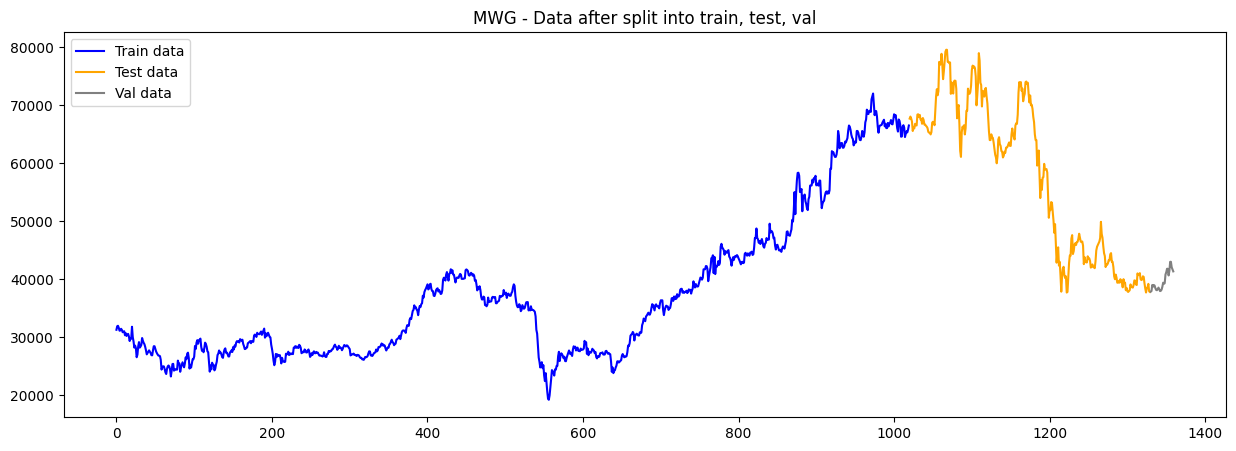

In [136]:
plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Price'], 'b')
plt.plot(test_data.index, test_data['Price'], 'orange')
plt.plot(val_data.index, val_data['Price'], 'gray')
plt.legend(['Train data', 'Test data', 'Val data'], loc='upper left')
plt.title('MWG - Data after split into train, test, val')
plt.show()

- Prepare x, y data:

In [137]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])

x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])

- Model training:

In [138]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

- Model Testing (one-step prediction):

In [139]:
y_pred_test = model_lr.predict(x_test)

- Model Validation (multi-step prediction) - 30 days prediction:

In [140]:
number_of_days_to_predict = 30

x_next_N_days = np.array(val_data.index).reshape(-1, 1)
y_next_N_days = model_lr.predict(x_next_N_days)

print('Predicted prices for the next {0} days:'.format(number_of_days_to_predict))
print(y_next_N_days)

Predicted prices for the next 30 days:
[64131.88652014 64165.06932743 64198.25213472 64231.43494201
 64264.6177493  64297.80055659 64330.98336389 64364.16617118
 64397.34897847 64430.53178576 64463.71459305 64496.89740035
 64530.08020764 64563.26301493 64596.44582222 64629.62862951
 64662.8114368  64695.9942441  64729.17705139 64762.35985868
 64795.54266597 64828.72547326 64861.90828055 64895.09108785
 64928.27389514 64961.45670243 64994.63950972 65027.82231701
 65061.0051243  65094.1879316 ]


- Model evaluating (RMSE - MAPE - MSLE):

In [141]:
# RMSE
test_rmse = mean_squared_error(y_pred_test, y_test, squared=False)
ndays_rmse = mean_squared_error(y_next_N_days, y_val, squared=False)
print('Testing RMSE:', np.round(test_rmse, 4))
print('Predicting {0} days RMSE:'.format(number_of_days_to_predict), np.round(ndays_rmse, 4))

# MAPE
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
ndays_mape = mean_absolute_percentage_error(y_next_N_days, y_val)
print('\nTesting MAPE:', np.round(test_mape, 4))
print('Predicting {0} days MAPE:'.format(number_of_days_to_predict), np.round(ndays_mape, 4))

# MSLE
test_msle = mean_squared_log_error(y_pred_test, y_test)
ndays_msle = mean_squared_log_error(y_next_N_days, y_val)
print('\nTesting MSLE:', np.round(test_msle, 4))
print('Predicting {0} days MSLE:'.format(number_of_days_to_predict), np.round(ndays_msle, 4))


Testing RMSE: 16264.1396
Predicting 30 days RMSE: 24962.7224

Testing MAPE: 0.2509
Predicting 30 days MAPE: 0.3858

Testing MSLE: 0.0879
Predicting 30 days MSLE: 0.2397


- Prediction plotting:

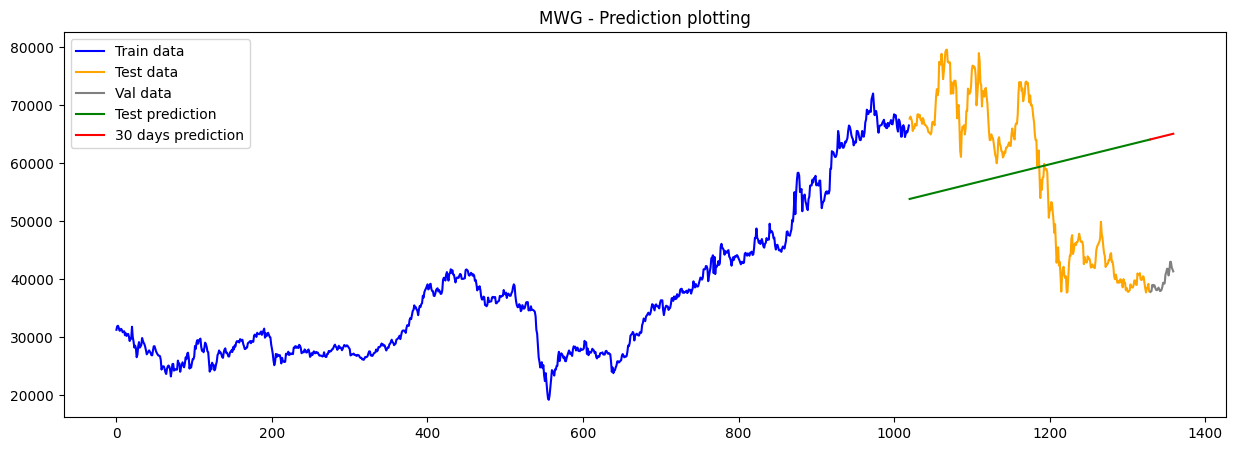

In [142]:
plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Price'], 'b')
plt.plot(test_data.index, test_data['Price'], 'orange')
plt.plot(val_data.index, val_data['Price'], 'gray')

plt.plot(test_data.index, y_pred_test, 'green')
plt.plot(val_data.index, y_next_N_days, 'red')

plt.legend(['Train data', 'Test data', 'Val data', 'Test prediction', '{0} days prediction'.format(number_of_days_to_predict)], loc='upper left')
plt.title('MWG - Prediction plotting')
plt.show()

### Dataset 3: VIC

In [143]:
np.round(df_vic.describe(), 2)

,Price,Open,High,Low
count,1360.00,1360.00,1360.00,1360.00
mean,89532.10,89452.99,90510.63,88301.07
std,18628.47,18628.30,18742.29,18556.38
min,50500.00,50600.00,50700.00,49700.00
25%,78100.00,78100.00,79000.00,77200.00
50%,94133.00,94222.00,95100.00,93111.50
75%,103111.00,103111.00,104100.00,102000.00
max,128000.00,128000.00,129689.00,127111.00


- Cast Date column to datetime type
- Sort data ascending by Date

In [144]:
df_vic['Date'] = pd.to_datetime(df_vic['Date'])
df_vic = df_vic.sort_values(by='Date', ascending=True)
df_vic.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
1359,2018-01-02,64628,64132,64876,63967,1.74M,1.16%
1358,2018-01-03,66529,65702,68760,64959,6.07M,2.94%
1357,2018-01-04,66942,67355,68678,66529,3.55M,0.62%
1356,2018-01-05,66116,66942,66942,65289,3.42M,-1.23%
1355,2018-01-08,66364,66116,67686,65372,4.81M,0.38%


- Split Price data
- Reset index

In [145]:
df_price = df_vic[['Price']]
df_price = df_price.reset_index(drop=True)
df_price.head(5)

,Price
0,64628
1,66529
2,66942
3,66116
4,66364


- Drop null values:

In [146]:
print('Before shape:', df_price.shape)

df_price.dropna()
print('After shape:', df_price.shape)

Before shape: (1360, 1)
After shape: (1360, 1)


- Split data into train, test, val (7.5-2.5):

In [147]:
train_size = int(0.75 * len(df_price))
val_size = 30 # 60 days
test_size = len(df_price) - train_size - val_size

train_data = df_price[:train_size]
test_data = df_price[train_size:train_size+test_size]
val_data = df_price[train_size+test_size:]

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(1020, 1)
(310, 1)
(30, 1)


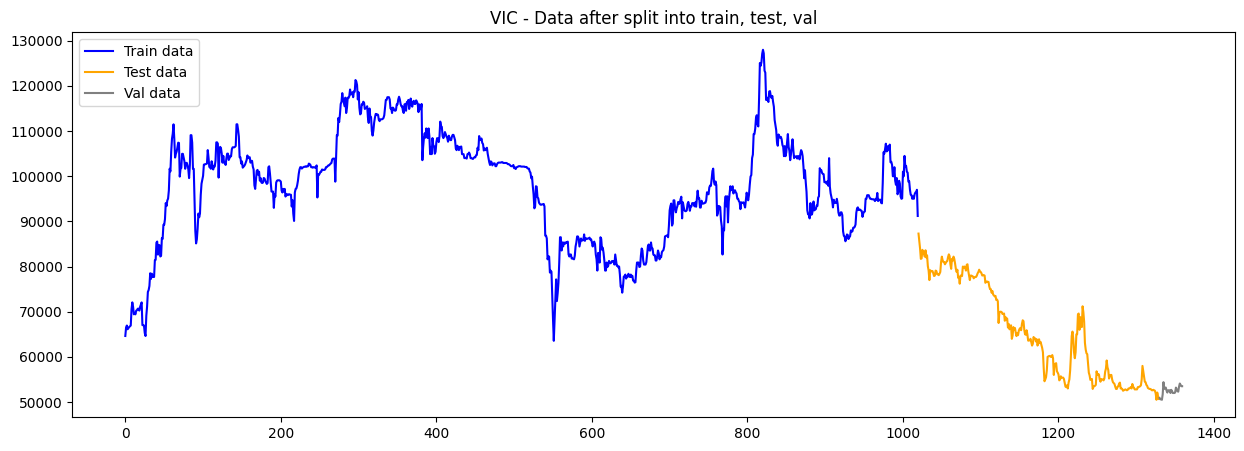

In [148]:
plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Price'], 'b')
plt.plot(test_data.index, test_data['Price'], 'orange')
plt.plot(val_data.index, val_data['Price'], 'gray')
plt.legend(['Train data', 'Test data', 'Val data'], loc='upper left')
plt.title('VIC - Data after split into train, test, val')
plt.show()

- Prepare x, y data:

In [149]:
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])

x_val = np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])

- Model training:

In [150]:
model_lr = LinearRegression()
model_lr.fit(x_train, y_train)

LinearRegression()

- Model Testing (one-step prediction):

In [151]:
y_pred_test = model_lr.predict(x_test)

- Model Validation (multi-step prediction) - 30 days prediction:

In [152]:
number_of_days_to_predict = 30

x_next_N_days = np.array(val_data.index).reshape(-1, 1)
y_next_N_days = model_lr.predict(x_next_N_days)

print('Predicted prices for the next {0} days:'.format(number_of_days_to_predict))
print(y_next_N_days)

Predicted prices for the next 30 days:
[94999.38547234 94995.84615651 94992.30684067 94988.76752483
 94985.22820899 94981.68889315 94978.14957731 94974.61026148
 94971.07094564 94967.5316298  94963.99231396 94960.45299812
 94956.91368228 94953.37436645 94949.83505061 94946.29573477
 94942.75641893 94939.21710309 94935.67778726 94932.13847142
 94928.59915558 94925.05983974 94921.5205239  94917.98120806
 94914.44189223 94910.90257639 94907.36326055 94903.82394471
 94900.28462887 94896.74531303]


- Model evaluating (RMSE - MAPE - MSLE):

In [153]:
# RMSE
test_rmse = mean_squared_error(y_pred_test, y_test, squared=False)
ndays_rmse = mean_squared_error(y_next_N_days, y_val, squared=False)
print('Testing RMSE:', np.round(test_rmse, 4))
print('Predicting {0} days RMSE:'.format(number_of_days_to_predict), np.round(ndays_rmse, 4))

# MAPE
test_mape = mean_absolute_percentage_error(y_pred_test, y_test)
ndays_mape = mean_absolute_percentage_error(y_next_N_days, y_val)
print('\nTesting MAPE:', np.round(test_mape, 4))
print('Predicting {0} days MAPE:'.format(number_of_days_to_predict), np.round(ndays_mape, 4))

# MSLE
test_msle = mean_squared_log_error(y_pred_test, y_test)
ndays_msle = mean_squared_log_error(y_next_N_days, y_val)
print('\nTesting MSLE:', np.round(test_msle, 4))
print('Predicting {0} days MSLE:'.format(number_of_days_to_predict), np.round(ndays_msle, 4))


Testing RMSE: 31720.2182
Predicting 30 days RMSE: 42472.895

Testing MAPE: 0.3141
Predicting 30 days MAPE: 0.4472

Testing MSLE: 0.1769
Predicting 30 days MSLE: 0.3519


- Prediction plotting:

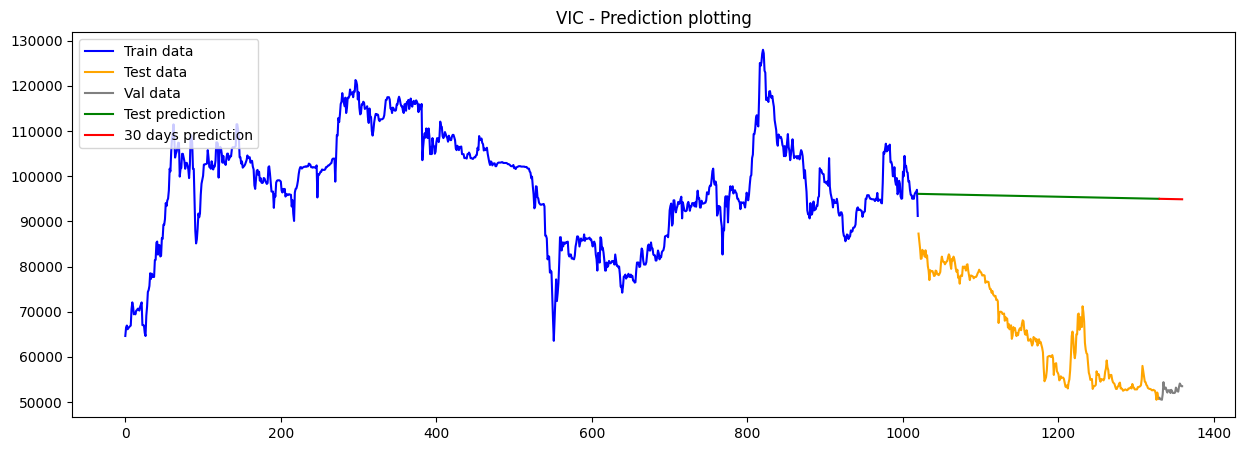

In [154]:
plt.figure(figsize=(15,5))
plt.plot(train_data.index, train_data['Price'], 'b')
plt.plot(test_data.index, test_data['Price'], 'orange')
plt.plot(val_data.index, val_data['Price'], 'gray')

plt.plot(test_data.index, y_pred_test, 'green')
plt.plot(val_data.index, y_next_N_days, 'red')

plt.legend(['Train data', 'Test data', 'Val data', 'Test prediction', '{0} days prediction'.format(number_of_days_to_predict)], loc='upper left')
plt.title('VIC - Prediction plotting')
plt.show()